#### 정규화하지 않는 데이터로 모델링

In [1]:
import pandas as pd

# 사용할 모델
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from freeman.plt_setting import plt_settings
from freeman.evaluation import regression_evaluation, f_importances, plot_actual_pred
from freeman.aiddd.data_manager import read_data

plt_settings()

In [2]:
df_X = read_data('fb-scaling-X')
df_y = read_data('fb-scaling-y')

In [3]:
df_X.drop('pole_cnts', axis=1, inplace=True)
training_columns = df_X.columns

In [4]:
X_train, X_test, y_train, y_test = \
    train_test_split(df_X, df_y, test_size=0.1)

In [5]:
SEED = 123
ml_models = {
    'LASSO': Lasso(),
    'RIDGE': Ridge(),
    'KNR': KNeighborsRegressor(),
    'DTR': DecisionTreeRegressor(),
    'RFR': RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=SEED),
    'GBR': GradientBoostingRegressor(),
    'EN': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=SEED),
    'XGR': XGBRegressor(eta=0.01, n_estimators=100, n_jobs=-1),
}

In [6]:
def model_fit_and_evaluation(model_key, display_start=0, display_size=50):
    model = ml_models[model_key]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'Evaluation: {model_key}')
    evaluation_value = regression_evaluation(y_test, predictions)
    evaluation_values.append(evaluation_value)
    model_names.append(model_key)
    try:
        f_importances(model, training_columns, model_key)
    except AttributeError as e:
        print(f'`{model_key}` object has no attribute `feature_importances_`')
    plot_actual_pred(
        y_test[display_start:display_start+display_size],
        predictions[display_start:display_start+display_size],
        model_key
    )

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.287e+16, tolerance: 1.258e+13
  model = cd_fast.enet_coordinate_descent(


Evaluation: LASSO
R2_SCORE: 0.529056, MAPE: 20.753373, MSE: 4888669893373.278320, RMSE: 2211033.670791, MAE: 1044093.134329
`LASSO` object has no attribute `feature_importances_`


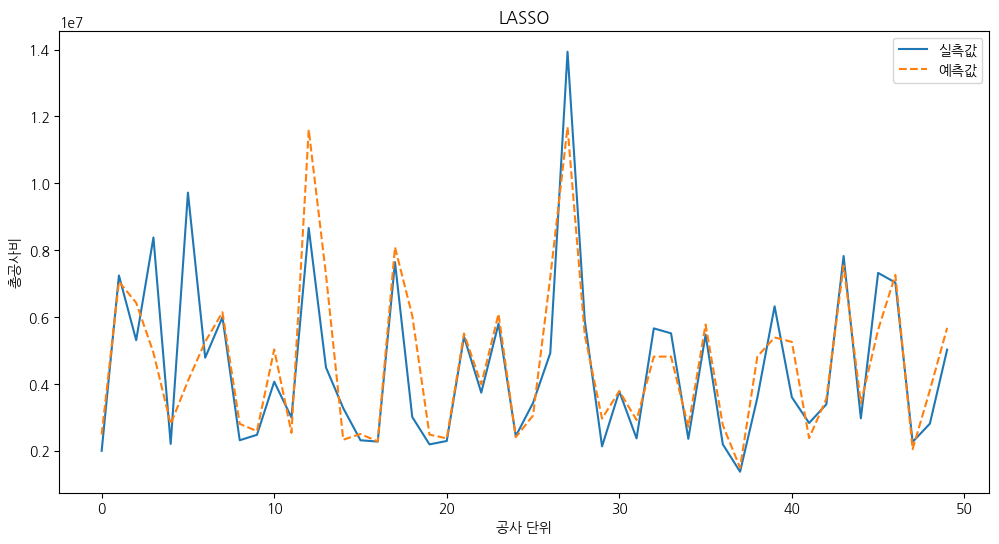

Evaluation: RIDGE
R2_SCORE: 0.531791, MAPE: 20.666521, MSE: 4860273312378.655273, RMSE: 2204602.756140, MAE: 1039829.085208
`RIDGE` object has no attribute `feature_importances_`


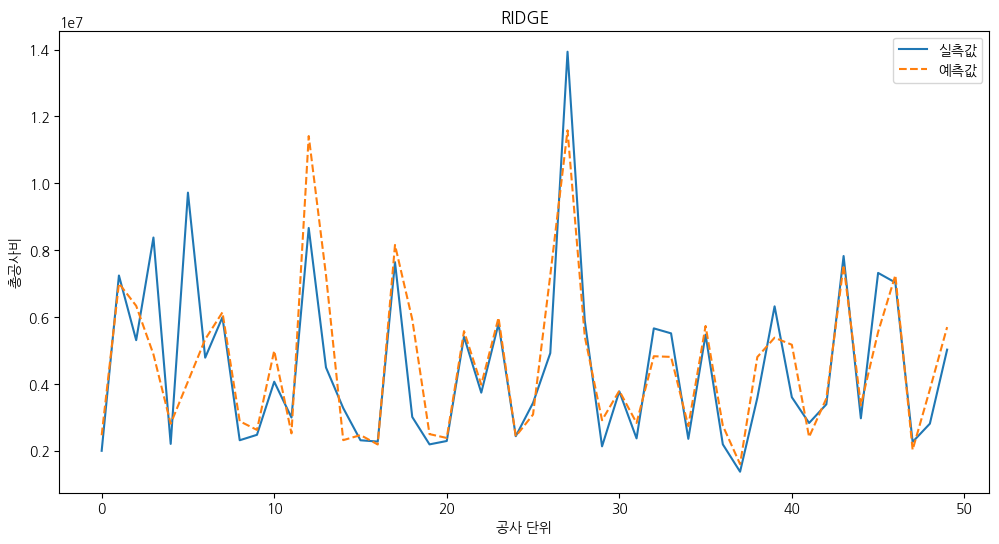

Evaluation: KNR
R2_SCORE: 0.458195, MAPE: 21.411893, MSE: 5624241706982.462891, RMSE: 2371548.377534, MAE: 1123660.924642
`KNR` object has no attribute `feature_importances_`


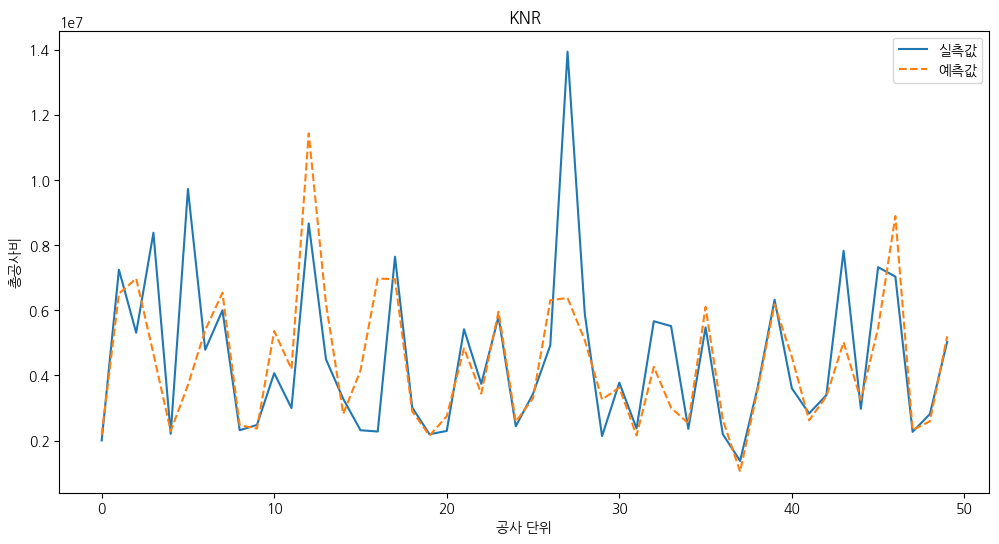

Evaluation: DTR
R2_SCORE: 0.000433, MAPE: 30.688998, MSE: 10376077931999.468750, RMSE: 3221192.004833, MAE: 1488361.235870


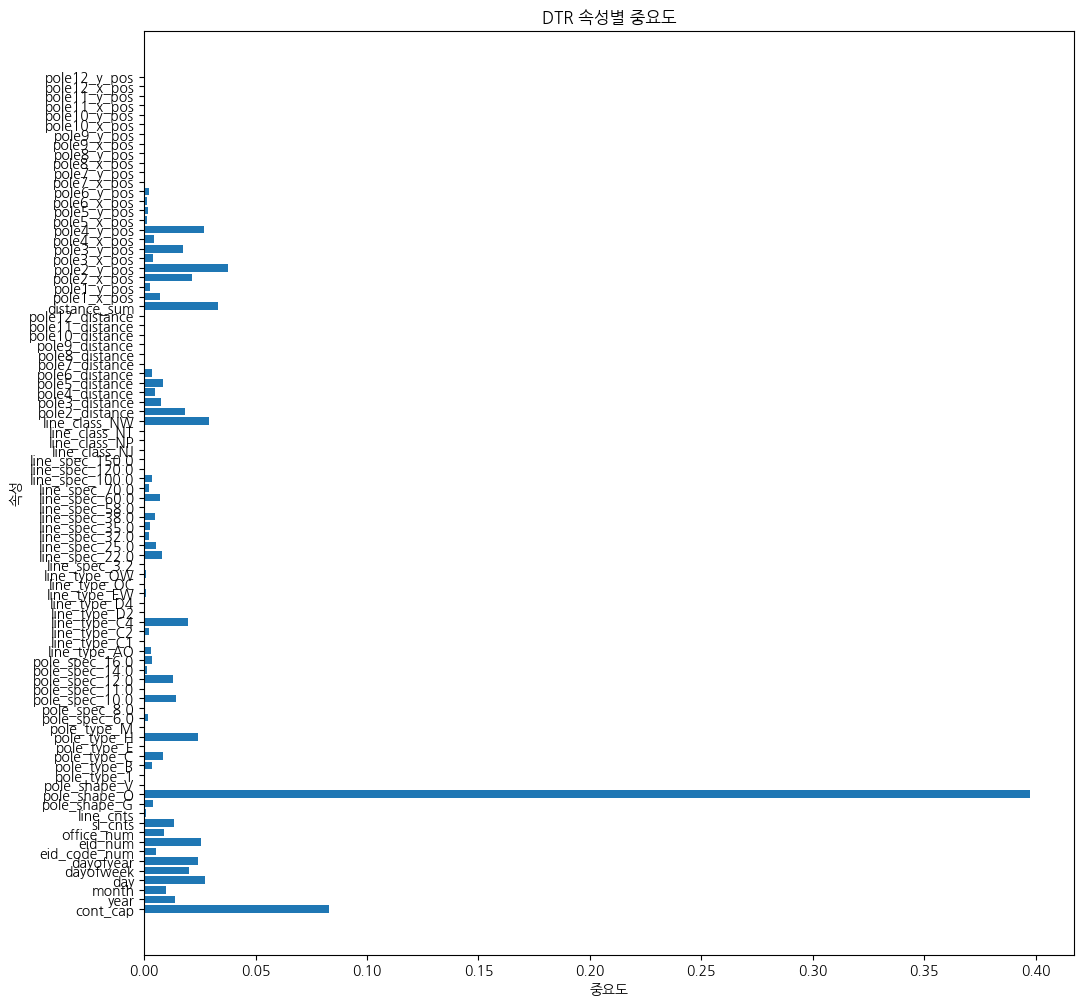

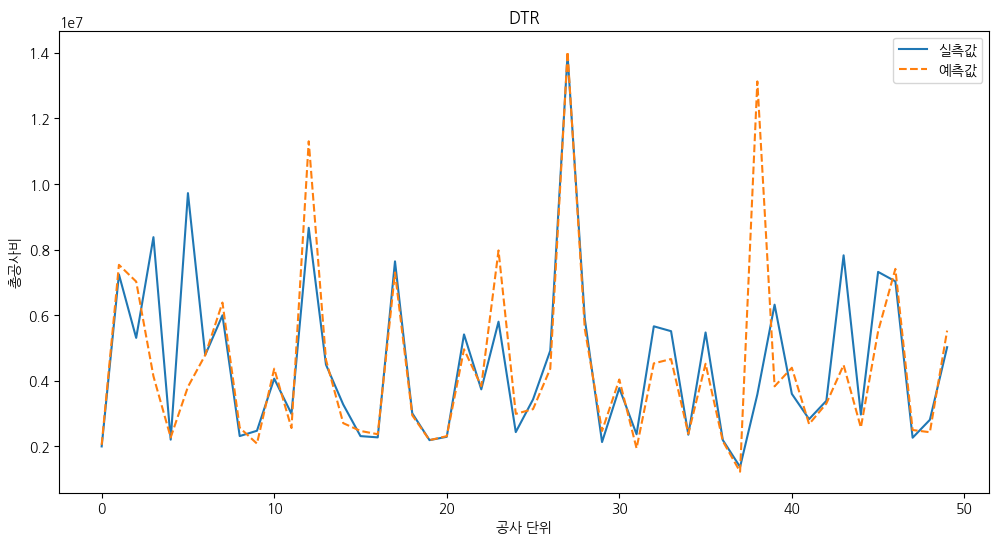

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Evaluation: RFR
R2_SCORE: 0.488219, MAPE: 21.462673, MSE: 5312581214497.245117, RMSE: 2304903.732154, MAE: 1093016.965106


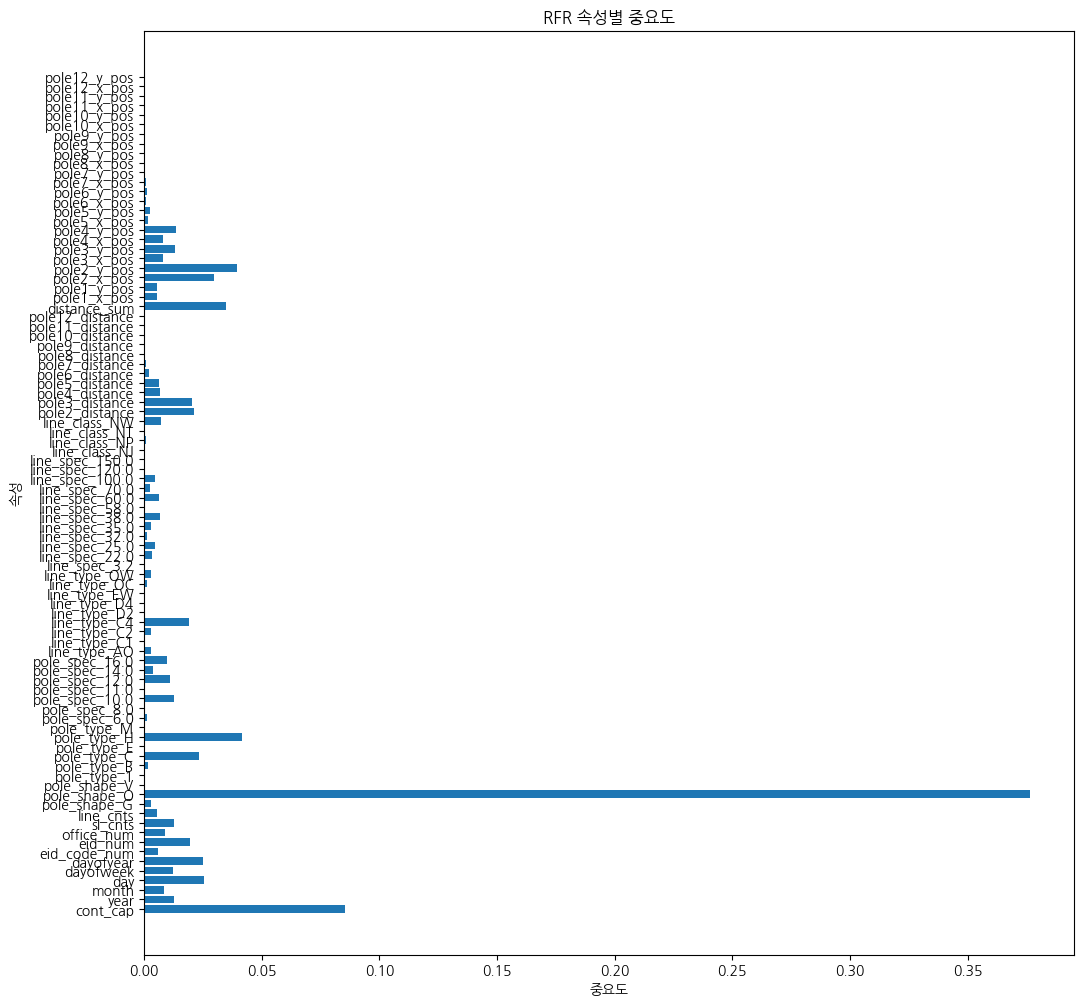

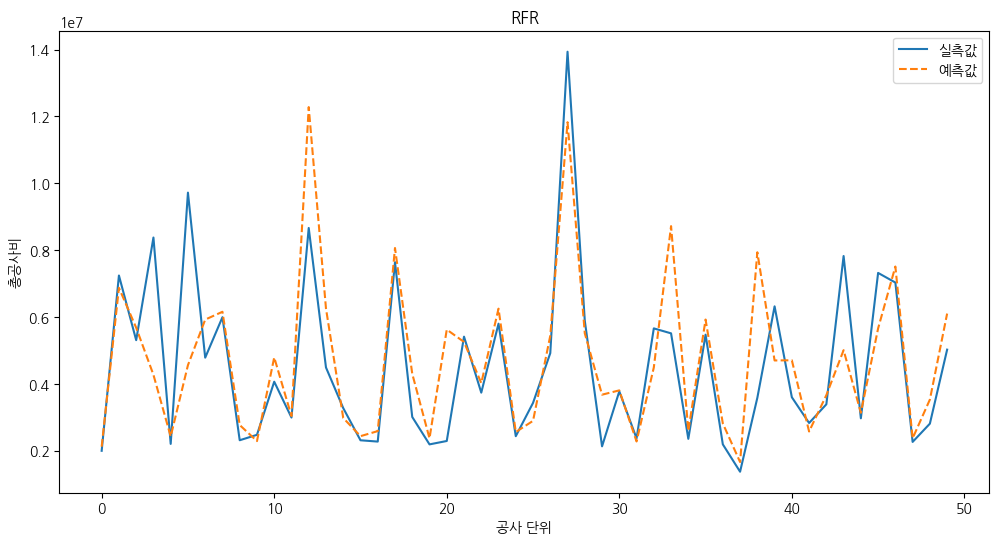

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluation: GBR
R2_SCORE: 0.533573, MAPE: 20.774938, MSE: 4841776172454.414062, RMSE: 2200403.638530, MAE: 1042507.862062


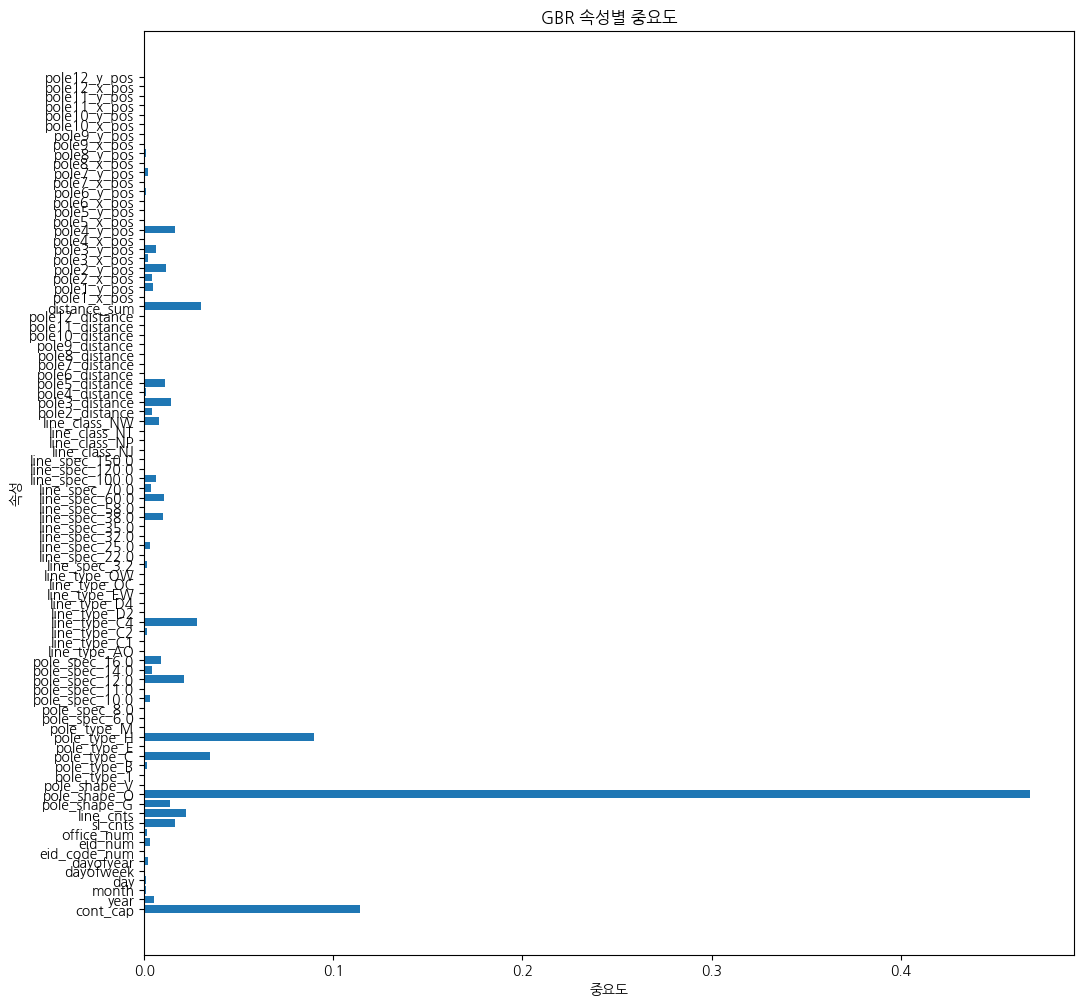

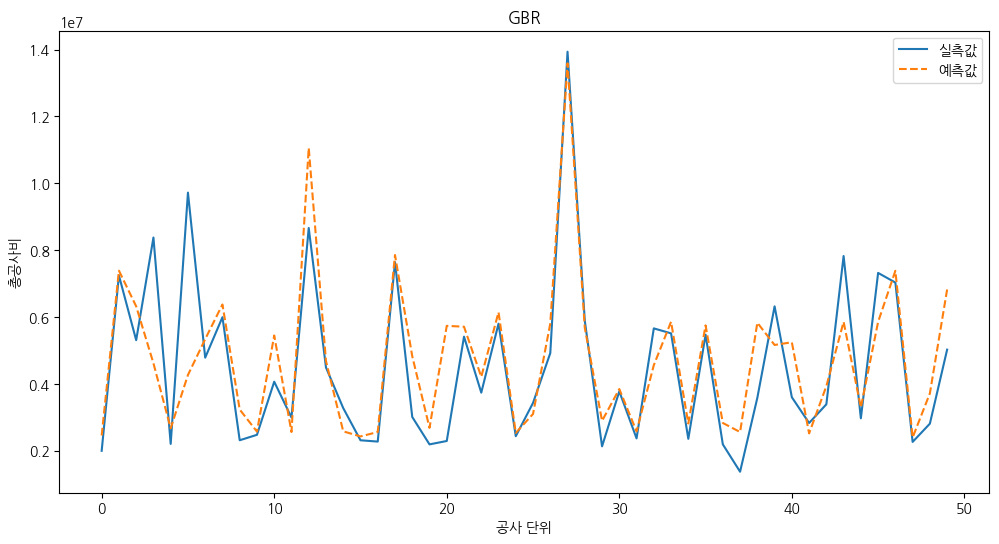

/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.490e+14, tolerance: 1.258e+13
  model = cd_fast.enet_coordinate_descent(


Evaluation: EN
R2_SCORE: 0.528368, MAPE: 20.763467, MSE: 4895809685523.120117, RMSE: 2212647.664117, MAE: 1036410.396940
`EN` object has no attribute `feature_importances_`


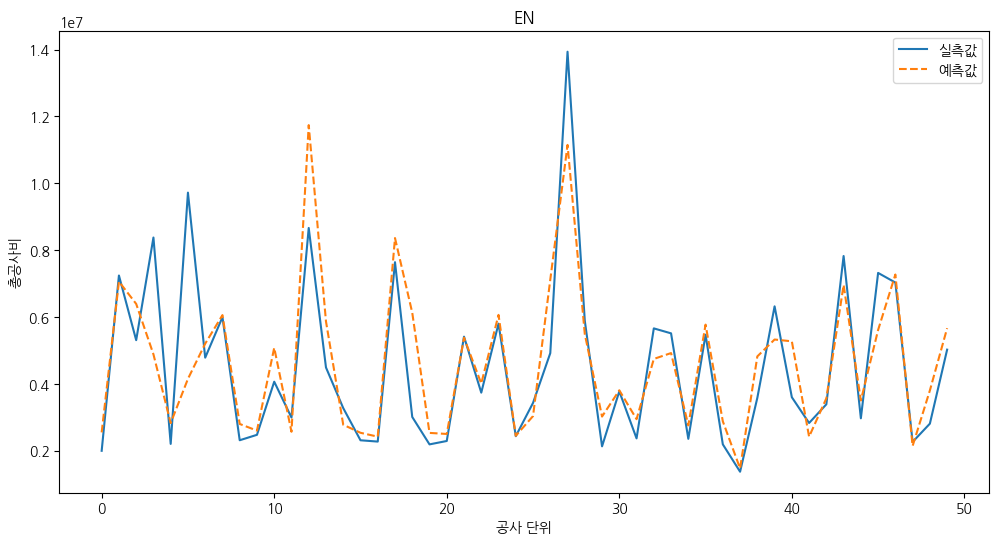

Evaluation: XGR
R2_SCORE: 0.137135, MAPE: 31.875071, MSE: 8957030273053.435547, RMSE: 2992829.810239, MAE: 1711548.454408


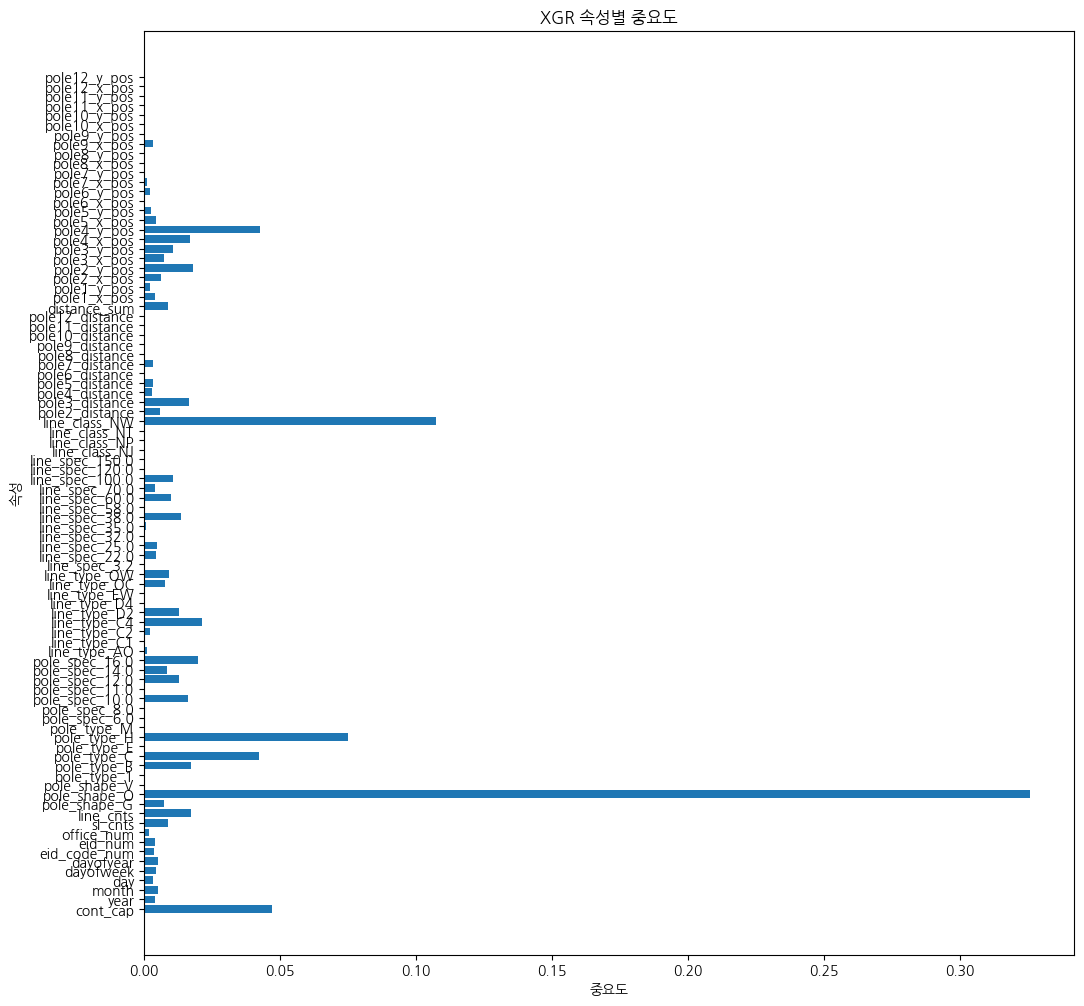

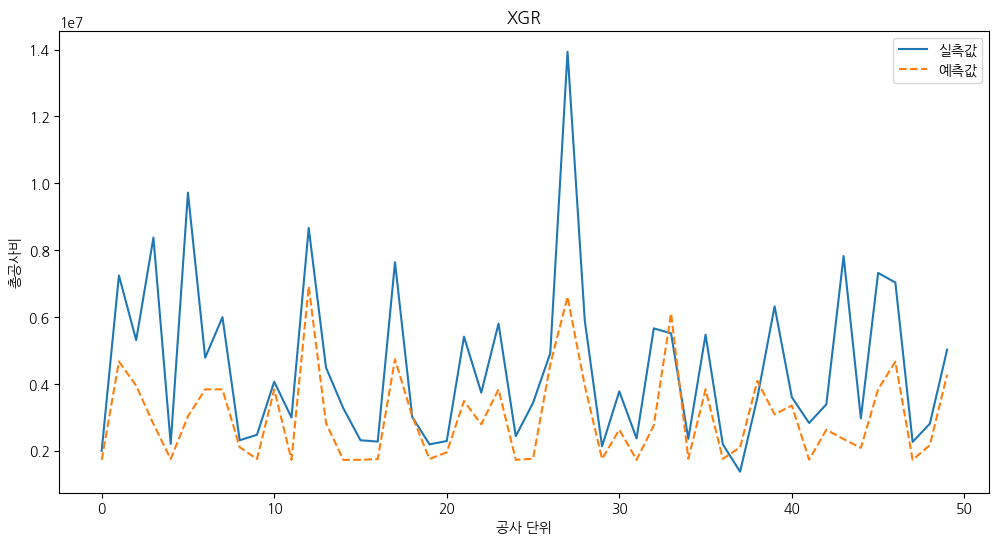

In [7]:
evaluation_values = []
model_names = []
column_names = ['r2score', 'mape', 'mse', 'rmse', 'mae']
for _model_key in ml_models.keys():
    model_fit_and_evaluation(_model_key, display_start=50, display_size=50)
    
df_evaluation = pd.DataFrame(
    evaluation_values, columns=column_names, index=model_names
)

In [8]:
df_evaluation

,r2score,mape,mse,rmse,mae
LASSO,0.529056,0.207534,4.888670e+12,2.211034e+06,1.044093e+06
RIDGE,0.531791,0.206665,4.860273e+12,2.204603e+06,1.039829e+06
KNR,0.458195,0.214119,5.624242e+12,2.371548e+06,1.123661e+06
DTR,0.000433,0.306890,1.037608e+13,3.221192e+06,1.488361e+06
RFR,0.488219,0.214627,5.312581e+12,2.304904e+06,1.093017e+06
GBR,0.533573,0.207749,4.841776e+12,2.200404e+06,1.042508e+06
EN,0.528368,0.207635,4.895810e+12,2.212648e+06,1.036410e+06
XGR,0.137135,0.318751,8.957030e+12,2.992830e+06,1.711548e+06
